In [1]:
# Avoid downloading files from the web 
# to which e.g. della comp nodes have no access
import os
#os.environ['PYSM_LOCAL_DATA']='/home/sa5705/web_files/'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import pysm3
import pysm3.units as u
from mapsim.noise_calc import *
import os

### Create a simple single frequency CMB map with pysm3

In [3]:
# Define params
nside = 256
nu = 93
unit = u.uK_CMB
np.random.seed(1000)

In [4]:
# Generate sky map
cmps = ["c1"] # sky components, currently CMB only
sky = pysm3.Sky(nside=nside, preset_strings=cmps, output_unit="uK_CMB")
mapp = sky.get_emission(nu * u.GHz)
mapp.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(nu*u.GHz))
#maps = np.array([emission.value for emission in mapp])

<Quantity [[-3.32427661e+00, -8.71757978e+01,  1.77616779e+00, ...,
            -4.99872723e+00, -1.64118483e+01,  1.80236893e+02],
           [-1.51284663e+00, -2.85322284e+00, -1.74326265e-01, ...,
             3.67484111e+00, -5.30572942e+00,  4.78468307e+00],
           [ 7.76138480e-01, -6.27765211e-01, -3.03002700e+00, ...,
            -1.96875532e+00, -1.19975434e+00, -2.04619522e+00]] uK_CMB>

In [5]:
# Smoothing, Equatorial coordinates, RING format
smooth = 0
if smooth:
    lmax = 3*nside-1
    beams = Simons_Observatory_V3_SA_beam_FWHM()
    ch_name = 'SO_SAT_93'
    nch = 2 #2nd freq channel
    fwhm = beams[nch]/60 #rad
    #map = pysm3.apply_smoothing_and_coord_transform(mapp, fwhm=fwhm, lmax=lmax, rot=hp.Rotator(coord="GC"))
    map = hp.smoothing(mapp, fwhm = np.radians(fwhm/60.))
else:
    map = mapp

In [6]:
# Write to disk 
os.system('mkdir -p input_maps')
hp.write_map(f'input_maps/cmb_SAT_f0{nu}_ns{nside}.fits', map, coord="C", dtype=np.float32, overwrite=True)

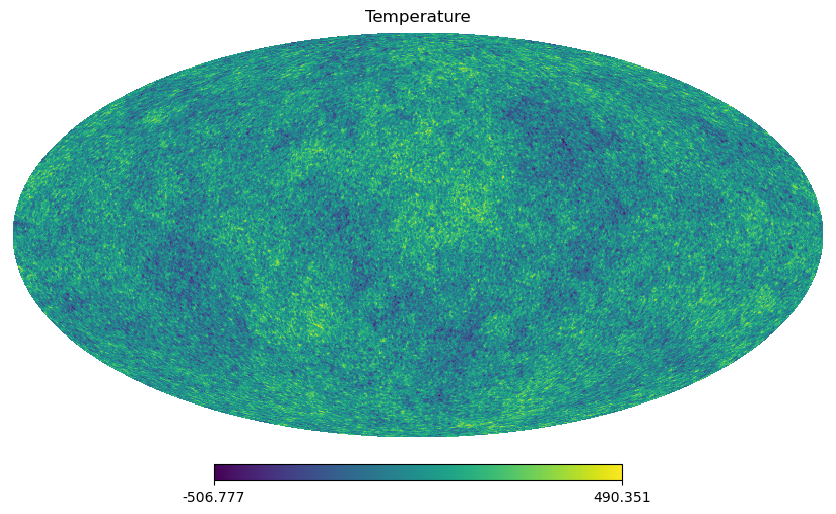

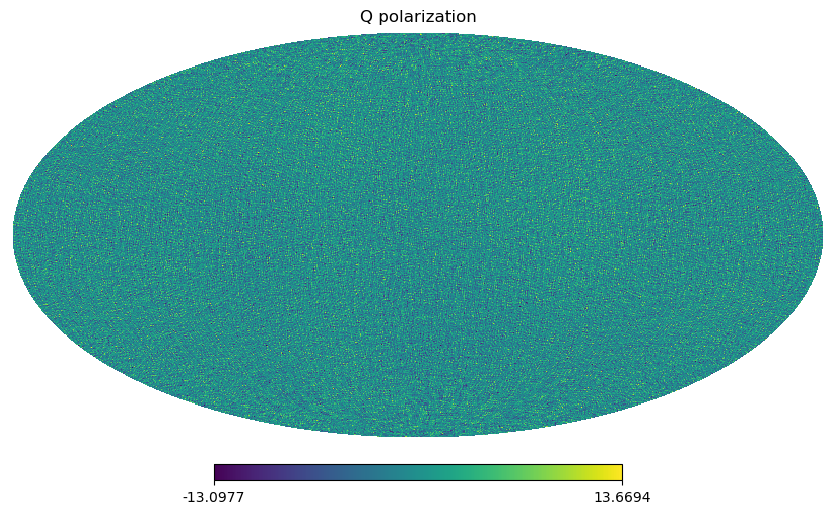

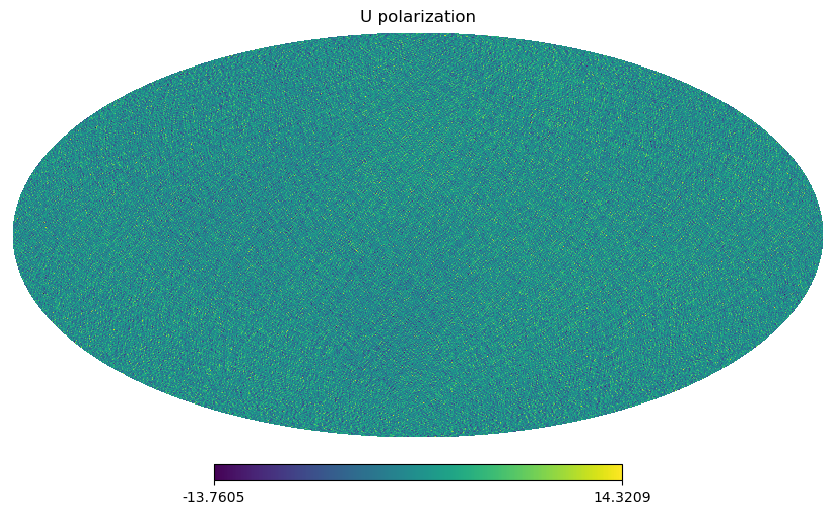

In [7]:
# Plot
npol = 3 # I,Q,U
lbl = ['Temperature', 'Q polarization', 'U polarization']
for pol in np.arange(npol):
    hp.mollview(map[pol,:], title=lbl[pol])

In [ ]:
#TODO: Integrate with current tools, e.g. BBSims

#### Continue to the next section

Go to [Section 3 - Schedule](Sec3_Make_and_Analyze_schedule.ipynb).